In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

# Set the path where you want to clone the repository
repo_path = '/content/drive/MyDrive/tp02_traitementDImage'

# Replace 'your_username' and 'your_repo' with your GitHub username and repository name
repo_url = 'https://github.com/DSARU-CERIST/BTI.git'

# Clone the repository
if not os.path.exists(repo_path):
    !git clone $repo_url $repo_path
else:
    %cd $repo_path
    !git pull origin master  # Update the repository if it already exists


Cloning into '/content/drive/MyDrive/tp02_traitementDImage'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 60 (delta 18), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (60/60), 2.90 MiB | 6.61 MiB/s, done.
fatal: premature end of pack file, 39 bytes missing
fatal: fetch-pack: invalid index-pack output


In [4]:
pip install opencv-python


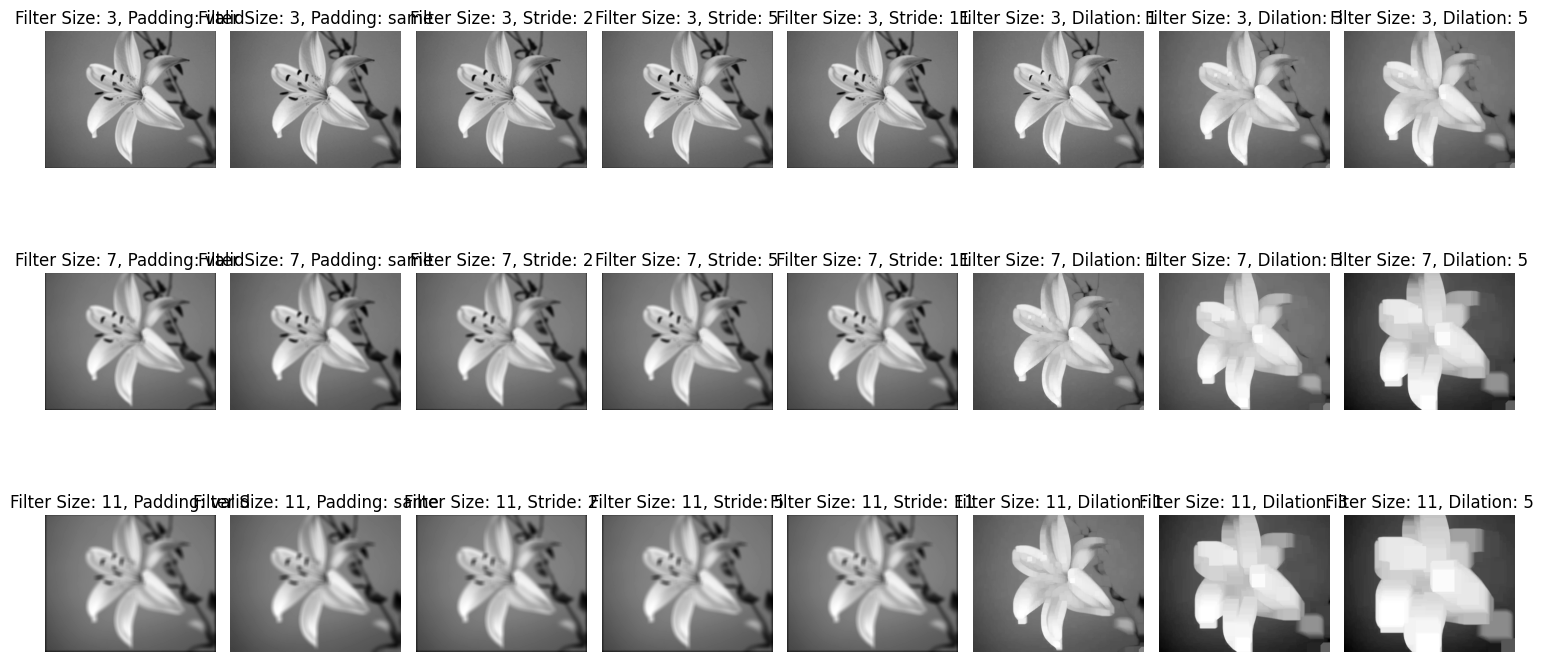

In [4]:
import cv2                      # Import OpenCV library for computer vision
import numpy as np              # Import NumPy library for numerical operations
import matplotlib.pyplot as plt # Import Matplotlib library for plotting

#1 Filtres discrets et détection de contours

# Load the grayscale image
image = cv2.imread('/flower.png', cv2.IMREAD_GRAYSCALE)
# Check if the image is loaded successfully
if image is None:
    print("Error: Could not load the image.")
    exit()

# Task 1: Apply the average filter for different values
filter_sizes = [3, 7, 11]
paddings = ['valid', 'same']
strides = [2, 5, 11]
dilations = [1, 3, 5]

# Create a subplot grid for visualizing the results
fig, axes = plt.subplots(len(filter_sizes), len(paddings) + len(strides) + len(dilations), figsize=(15, 8))

# Loop over filter sizes
for i, size in enumerate(filter_sizes):
    # Loop over padding options
    for j, padding in enumerate(paddings):
        # Create a kernel for the average filter
        kernel = np.ones((size, size), np.float32) / (size * size) # create a matrix that represents the filter, specifically for an average filter.

        #/ (size * size) normalizes the values in the matrix by dividing each element by the total number of elements,
        # ensuring the sum of all elements in the matrix is 1. This is common for an average filter, as it calculates the average value in the neighborhood.

        # Choose the appropriate borderType for 'valid' or 'same' padding

        if padding == 'valid':
            result = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)
        elif padding == 'same':
            result = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT)

        # Display the result in the subplot
        axes[i, j].imshow(result, cmap='gray')
        axes[i, j].set_title(f'Filter Size: {size}, Padding: {padding}')
        axes[i, j].axis('off')

    # Loop over stride values
    for k, stride in enumerate(strides):
        # Apply the filter with the specified stride
        result = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)
        # Display the result in the subplot
        axes[i, len(paddings) + k].imshow(result, cmap='gray')
        axes[i, len(paddings) + k].set_title(f'Filter Size: {size}, Stride: {stride}')
        axes[i, len(paddings) + k].axis('off')

    # Loop over dilation values
    for l, dilation in enumerate(dilations):
        # Create a structuring element for dilation
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
        # Apply dilation using cv2.dilate
        result = cv2.dilate(image, kernel, iterations=dilation)
        # Display the result in the subplot
        axes[i, len(paddings) + len(strides) + l].imshow(result, cmap='gray')
        axes[i, len(paddings) + len(strides) + l].set_title(f'Filter Size: {size}, Dilation: {dilation}')
        axes[i, len(paddings) + len(strides) + l].axis('off')

# Adjust the layout and display the subplots
plt.tight_layout()
plt.show()


In [ ]:
# Task 2: Automate the convolution analysis process
def filter_analysis(image, filter_function, title):
    result = filter_function(image)
    plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Gaussian filter function
def gaussian_mask(size, sigma):
    kernel = cv2.getGaussianKernel(size, sigma)
    return np.outer(kernel, kernel)

filter_analysis(image, lambda img: cv2.filter2D(img, -1, gaussian_mask(5, 1)), 'Gaussian Filter')

# Task 3: Repeat the analysis for a color image
color_image = cv2.imread('flower.jpg', cv2.IMREAD_COLOR)

color_filter_analysis(color_image, lambda img: cv2.filter2D(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), -1, kernel),
                      'Gaussian Filter (Color Image)')

# Task 4: Sobel filter functions
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

Gx = cv2.filter2D(image, -1, Sx)
Gy = cv2.filter2D(image, -1, Sy)

# Task 5: Function to calculate gradient magnitude and direction
def gradient_analysis(image):
    G = np.sqrt(Gx**2 + Gy**2)
    theta = np.arctan2(Gy, Gx)
    return G, theta

gradient_magnitude, gradient_direction = gradient_analysis(image)

# Task 6: Function to display gradient orientations
def grad_orientation(orientation_map, bins=8):
    cmap = plt.cm.get_cmap('jet', bins + 1)
    ori_map = orientation_map / (2 * np.pi) * bins
    plt.imshow(ori_map, cmap=cmap, vmin=-1, vmax=bins - 1)
    plt.colorbar()
    plt.axis('off')
    plt.title("Orientations")
    plt.show()

grad_orientation(gradient_direction)

# Task 7: Edge detection using a first-order filter with thresholding
def edge_detection(image, threshold):
    G, _ = gradient_analysis(image)
    edges = np.where(G > threshold, 255, 0).astype(np.uint8)
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection (Threshold: {threshold})')
    plt.axis('off')
    plt.show()

edge_detection(image, threshold=50)

# Task 8: Laplacian filter
L = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
LI = cv2.filter2D(image, -1, L)

# Task 9: Function to find contour points
def find_contours(LI, threshold):
    contours = np.zeros_like(LI, dtype=np.uint8)
    for i in range(1, LI.shape[0] - 1):
        for j in range(1, LI.shape[1] - 1):
            window = LI[i-1:i+2, j-1:j+2]
            max_val = np.max(window)
            min_val = np.min(window)
            if max_val > 0 and min_val < 0 and max_val - min_val > threshold:
                contours[i, j] = 255
    plt.imshow(contours, cmap='gray')
    plt.title(f'Contour Points (Threshold: {threshold})')
    plt.axis('off')
    plt.show()

find_contours(LI, threshold=5)